***ANDREIA CALDEIRA LUCIANO***

## ***Objetivo:*** ***Predizer casos de morte (número de mortes) - Covid - 19 Com  categorizazção de Dados***

________________________________________________________________________________

# ***DADOS EPIDEMIOLOGICOS***

________________________________________________________________________________

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler
import numpy as np

# Lendo o arquivo Excel
df = pd.read_excel('dados_epidemiologicos.xlsx')

# Verificando as primeiras e últimas linhas do DataFrame
display(df.head())
display(df.tail())
df.info()

In [ ]:
# Plotando a correlação entre as variáveis usando clustermap
plt.figure(figsize=(10, 8))
sns.clustermap(df.corr(), annot=True, cmap='coolwarm', figsize=(12, 10))
plt.title('Correlação entre variáveis')
plt.show()

In [ ]:
# Selecionando as variáveis independentes (features) e a variável dependente (target)
features = df[['total_cases', 'new_cases', 'new_deaths', 'icu_patients', 'hosp_patients', 'weekly_icu_admissions', 'weekly_hosp_admissions']]
target = df['total_deaths']

# Dividindo os dados em conjuntos de treino e teste
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)

# Normalização (opcional, dependendo do modelo)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Modelo de Regressão Linear
lin_model = LinearRegression()
lin_model.fit(X_train, y_train)
y_pred_lin = lin_model.predict(X_test)

# Avaliando o modelo de Regressão Linear
mse_lin = mean_squared_error(y_test, y_pred_lin)
mae_lin = mean_absolute_error(y_test, y_pred_lin)
r2_lin = r2_score(y_test, y_pred_lin)

print(f'Regressão Linear - Mean Squared Error: {mse_lin}')
print(f'Regressão Linear - Mean Absolute Error: {mae_lin}')
print(f'Regressão Linear - R^2 Score: {r2_lin}')


In [ ]:
# Modelo de Random Forest
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)
y_pred_rf = rf_model.predict(X_test)

# Avaliando o modelo de Random Forest
mse_rf = mean_squared_error(y_test, y_pred_rf)
mae_rf = mean_absolute_error(y_test, y_pred_rf)
r2_rf = r2_score(y_test, y_pred_rf)

print(f'Random Forest - Mean Squared Error: {mse_rf}')
print(f'Random Forest - Mean Absolute Error: {mae_rf}')
print(f'Random Forest - R^2 Score: {r2_rf}')

In [ ]:
# Importância das características do Random Forest
importancia_features = rf_model.feature_importances_
caracteristicas = features.columns

plt.figure(figsize=(10, 6))
plt.bar(caracteristicas, importancia_features, color='red')
plt.title('Importância das Características (Random Forest)')
plt.xlabel('Características')
plt.ylabel('Importância')
plt.xticks(rotation=45, ha='right')
plt.show()

In [ ]:
# Comparando valores previstos e reais
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred_lin, color='blue', label='Regressão Linear')
plt.scatter(y_test, y_pred_rf, color='red', label='Random Forest')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], '--', color='yellow')
plt.xlabel('Valores Reais')
plt.ylabel('Valores Previstos')
plt.title('Comparação de Valores Reais e Previstos')
plt.legend()
plt.show()

In [ ]:
# Analisando o desempenho dos modelos
metricas = ['Mean Squared Error (MSE)', 'R^2 Score', 'Mean Absolute Error (MAE)']
valores_lin = [mse_lin, r2_lin, mae_lin]
valores_rf = [mse_rf, r2_rf, mae_rf]

# Índice das métricas
metrica_index = np.arange(len(metricas))

# Plotando as métricas em um gráfico de linha para Regressão Linear e Random Forest
plt.figure(figsize=(10, 6))
plt.plot(metrica_index, valores_lin, marker='o', color='blue', linestyle='-', label='Regressão Linear')
plt.plot(metrica_index, valores_rf, marker='o', color='red', linestyle='-', label='Random Forest')
plt.title('Análise de Desempenho dos Modelos')
plt.xticks(metrica_index, metricas)
plt.ylabel('Valor')
plt.legend()
plt.grid(True)
plt.show()


****************************************************************************************************************************************************************

## ***DADOS DEMOGRAFICOS E SOCIOECONOMICOS***

_____________________________________________________________________________

,total_deaths,population_density,median_age,aged_65_older,aged_70_older,gdp_per_capita,extreme_poverty,human_development_index,population
0,10,104871,380,13188,8643,11803431,1.1,795,28423180
1,10,104871,380,13188,8643,11803431,1.1,795,28423180
2,10,104871,380,13188,8643,11803431,1.1,795,28423180
3,10,104871,380,13188,8643,11803431,1.1,795,28423180
4,10,104871,380,13188,8643,11803431,1.1,795,28423180


,total_deaths,population_density,median_age,aged_65_older,aged_70_older,gdp_per_capita,extreme_poverty,human_development_index,population
146423,57020,42729,196,2822,1882,1899775,21.4,571,163205390
146424,57020,42729,196,2822,1882,1899775,21.4,571,163205390
146425,57070,42729,196,2822,1882,1899775,21.4,571,163205390
146426,57070,42729,196,2822,1882,1899775,21.4,571,163205390
146427,57070,42729,196,2822,1882,1899775,21.4,571,163205390


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 146428 entries, 0 to 146427
Data columns (total 9 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   total_deaths             146428 non-null  int64  
 1   population_density       146428 non-null  int64  
 2   median_age               146428 non-null  int64  
 3   aged_65_older            146428 non-null  int64  
 4   aged_70_older            146428 non-null  int64  
 5   gdp_per_capita           146428 non-null  int64  
 6   extreme_poverty          146428 non-null  float64
 7   human_development_index  146428 non-null  int64  
 8   population               146428 non-null  int64  
dtypes: float64(1), int64(8)
memory usage: 10.1 MB
Matriz de Correlação:
                         population  population_density  median_age  \
population                 1.000000           -0.003697    0.026693   
population_density        -0.003697            1.000000    0.046674   

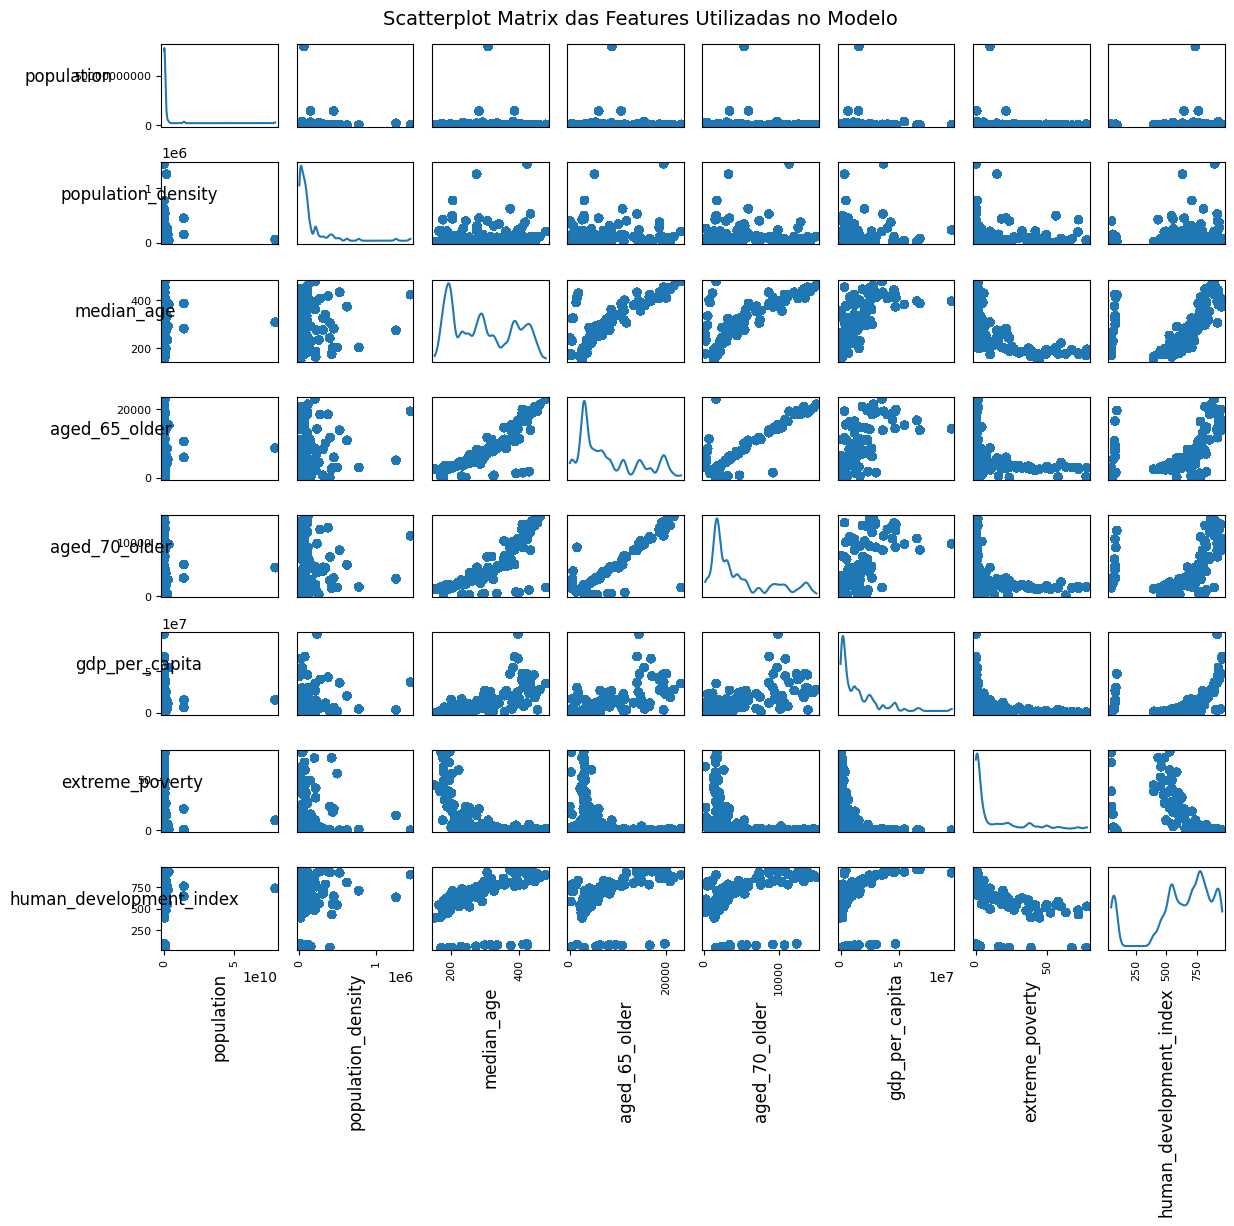

In [20]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

# Carregar os dados
df = pd.read_excel('dados_demo_socio.xlsx')

# Verificando as primeiras e últimas linhas do DataFrame
display(df.head())
display(df.tail())
df.info()

# Selecionar as colunas relevantes para o modelo
features = ['population', 'population_density', 'median_age', 'aged_65_older',
            'aged_70_older', 'gdp_per_capita', 'extreme_poverty', 'human_development_index']
target = 'total_deaths'  # Substitua pelo nome correto da coluna de casos de morte

# Calcular a matriz de correlação
correlation_matrix = df[features].corr()
print("Matriz de Correlação:")
print(correlation_matrix)

# Criar a matriz de scatterplots
scatter_matrix = pd.plotting.scatter_matrix(df[features], figsize=(12, 10), diagonal='kde', marker='o', s=40, alpha=0.5)
plt.tight_layout()

# Adicionar títulos aos eixos
for ax in scatter_matrix.ravel():
    ax.set_xlabel(ax.get_xlabel(), fontsize=12, rotation=90)
    ax.set_ylabel(ax.get_ylabel(), fontsize=12, rotation=0)

plt.suptitle('Scatterplot Matrix das Features Utilizadas no Modelo', y=1.02, fontsize=14)
plt.show()


In [ ]:
# Dividir os dados em conjunto de treino e teste
X = df[features]
y = df[target]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Inicializar e treinar o modelo de Regressão Linear
modelo_lr = LinearRegression()
modelo_lr.fit(X_train, y_train)
y_pred_lr = modelo_lr.predict(X_test)

# Inicializar e treinar o modelo RandomForestRegressor
modelo_rf = RandomForestRegressor(n_estimators=100, max_depth=10, random_state=42)
modelo_rf.fit(X_train, y_train)
y_pred_rf = modelo_rf.predict(X_test)

# Avaliar os modelos
mse_lr = mean_squared_error(y_test, y_pred_lr)
r2_lr = r2_score(y_test, y_pred_lr)
mae_lr = mean_absolute_error(y_test, y_pred_lr)

mse_rf = mean_squared_error(y_test, y_pred_rf)
r2_rf = r2_score(y_test, y_pred_rf)
mae_rf = mean_absolute_error(y_test, y_pred_rf)

print("Desempenho dos Modelos:")
print(f'Regressão Linear - Mean Squared Error (MSE): {mse_lr:.2f}')
print(f'Regressão Linear - R^2 Score: {r2_lr:.2f}')
print(f'Regressão Linear - Mean Absolute Error (MAE): {mae_lr:.2f}')

print(f'Random Forest - Mean Squared Error (MSE): {mse_rf:.2f}')
print(f'Random Forest - R^2 Score: {r2_rf:.2f}')
print(f'Random Forest - Mean Absolute Error (MAE): {mae_rf:.2f}')


In [ ]:
# Extrair importância das características do modelo RandomForestRegressor
importancias_features = modelo_rf.feature_importances_

# Criar dicionário com características e suas importâncias
importancia_features = dict(zip(features, importancias_features))

# Extrair características e importâncias
caracteristicas = list(importancia_features.keys())
importancias = list(importancia_features.values())

# Criar gráfico de linha
plt.figure(figsize=(10, 6))
plt.plot(caracteristicas, importancias, marker='o', color='brown', linestyle='-')
plt.title('Importância das Características')
plt.xlabel('Características')
plt.ylabel('Importância')
plt.xticks(rotation=45, ha='right')

plt.grid(True)
plt.tight_layout()
plt.show()


In [ ]:
import matplotlib.pyplot as plt

# Plotagem de resultados para Regressão Linear e Random Forest em um só gráfico
plt.figure(figsize=(10, 6))

# Regressão Linear
plt.scatter(y_test, y_pred_lr, color='blue', label='Regressão Linear')
# Random Forest
plt.scatter(y_test, y_pred_rf, color='brown', label='Random Forest')

# Linha de referência
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], '--', color='red', linewidth=2)

# Configurações do gráfico
plt.xlabel('Observado')
plt.ylabel('Previsto')
plt.title('Previsto vs Observado (Regressão Linear vs Random Forest)')
plt.legend()
plt.grid(True)
plt.show()


In [ ]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import numpy as np

# Cálculo das métricas para Regressão Linear
mse_lr = mean_squared_error(y_test, y_pred_lr)
mae_lr = mean_absolute_error(y_test, y_pred_lr)
r2_lr = r2_score(y_test, y_pred_lr)
corr_lr = np.corrcoef(y_test, y_pred_lr)[0, 1]

# Cálculo das métricas para Random Forest
mse_rf = mean_squared_error(y_test, y_pred_rf)
mae_rf = mean_absolute_error(y_test, y_pred_rf)
r2_rf = r2_score(y_test, y_pred_rf)
corr_rf = np.corrcoef(y_test, y_pred_rf)[0, 1]

# Apresentação dos resultados
print("Métricas de Desempenho para Regressão Linear:")
print(f"Mean Squared Error (MSE): {mse_lr:.2f}")
print(f"Mean Absolute Error (MAE): {mae_lr:.2f}")
print(f"R^2 Score: {r2_lr:.2f}")
print(f"Coeficiente de Correlação: {corr_lr:.2f}")

print("\nMétricas de Desempenho para Random Forest:")
print(f"Mean Squared Error (MSE): {mse_rf:.2f}")
print(f"Mean Absolute Error (MAE): {mae_rf:.2f}")
print(f"R^2 Score: {r2_rf:.2f}")
print(f"Coeficiente de Correlação: {corr_rf:.2f}")



In [ ]:
# Gráfico de Desempenho dos Modelos
metricas = ['Mean Squared Error (MSE)', 'R^2 Score', 'Mean Absolute Error (MAE)']
valores_lr = [mse_lr, r2_lr, mae_lr]
valores_rf = [mse_rf, r2_rf, mae_rf]

# Índice das métricas
metrica_index = np.arange(len(metricas))

# Plotando as métricas em um gráfico de linha para Regressão Linear e Random Forest
plt.figure(figsize=(10, 6))
plt.plot(metrica_index, valores_lr, marker='o', color='blue', linestyle='-', label='Regressão Linear')
plt.plot(metrica_index, valores_rf, marker='o', color='red', linestyle='-', label='Random Forest')
plt.title('Análise de Desempenho dos Modelos')
plt.xticks(metrica_index, metricas)
plt.ylabel('Valor')
plt.legend()
plt.grid(True)
plt.show()

________________________________________________________________________________________________________________________________________________________________

## ***DADOS SAUDE E COMPORTAMENTO***

________________________________________________________________________________________________________________________________________________________________

In [27]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

# Carregar os dados
df = pd.read_excel('dados_saude_comportamento.xlsx')

# Verificando as primeiras e últimas linhas do DataFrame
display(df.head())
display(df.tail())
df.info()

,total_deaths,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers
0,10,304195,1008,7.1,51.2
1,10,304195,1008,7.1,51.2
2,10,304195,1008,7.1,51.2
3,10,304195,1008,7.1,51.2
4,10,304195,1008,7.1,51.2


,total_deaths,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers
167722,57020,307846,182,1.6,30.7
167723,57020,307846,182,1.6,30.7
167724,57070,307846,182,1.6,30.7
167725,57070,307846,182,1.6,30.7
167726,57070,307846,182,1.6,30.7


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 167727 entries, 0 to 167726
Data columns (total 5 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   total_deaths           167727 non-null  int64  
 1   cardiovasc_death_rate  167727 non-null  int64  
 2   diabetes_prevalence    167727 non-null  int64  
 3   female_smokers         167727 non-null  float64
 4   male_smokers           167727 non-null  float64
dtypes: float64(2), int64(3)
memory usage: 6.4 MB


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

# Carregar os dados
df = pd.read_excel('dados_saude_comportamento.xlsx')

# Verificar colunas presentes no DataFrame
print("Colunas disponíveis no DataFrame:")
print(df.columns)

# Definir as features e a variável target
features = ['cardiovasc_death_rate', 'diabetes_prevalence', 'female_smokers', 'male_smokers']
target = 'total_deaths'

# Verificar se todas as colunas necessárias estão presentes no DataFrame
missing_features = [col for col in features + [target] if col not in df.columns]
if missing_features:
    print(f"As seguintes colunas estão faltando no DataFrame: {missing_features}")
else:
    # Calcular a matriz de correlação
    correlation_matrix = df[features + [target]].corr()

    # Imprimir correlações numéricas
    print("Matriz de Correlação:")
    print(correlation_matrix)

    # Plotar a matriz de correlação
    plt.figure(figsize=(14, 12))
    sns.heatmap(correlation_matrix, annot=True, fmt='.2f', cmap='coolwarm', linewidths=0.5)
    plt.title('Matriz de Correlação das Características')
    plt.show()

    # Dividir os dados em conjunto de treino e teste
    X = df[features]
    y = df[target]
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    # Inicializar e treinar o modelo de Regressão Linear
    modelo_lr = LinearRegression()
    modelo_lr.fit(X_train, y_train)
    y_pred_lr = modelo_lr.predict(X_test)

    # Inicializar e treinar o modelo RandomForestRegressor
    modelo_rf = RandomForestRegressor(n_estimators=100, max_depth=10, random_state=42)
    modelo_rf.fit(X_train, y_train)
    y_pred_rf = modelo_rf.predict(X_test)

    # Calcular diferenças entre valores reais e previstos
    diff_lr = y_test - y_pred_lr
    diff_rf = y_test - y_pred_rf

    # Plotar gráfico de dispersão dos valores reais e previstos
    plt.figure(figsize=(12, 8))
    plt.scatter(y_test, y_pred_lr, color='blue', label='Regressão Linear')
    plt.scatter(y_test, y_pred_rf, color='red', label='Random Forest')
    plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], '--', color='gray')
    plt.xlabel('Valores Reais')
    plt.ylabel('Valores Previstos')
    plt.title('Comparação de Valores Reais e Previstos')
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.show()

    # Avaliar os modelos
    mse_lr = mean_squared_error(y_test, y_pred_lr)
    r2_lr = r2_score(y_test, y_pred_lr)
    mae_lr = mean_absolute_error(y_test, y_pred_lr)

    mse_rf = mean_squared_error(y_test, y_pred_rf)
    r2_rf = r2_score(y_test, y_pred_rf)
    mae_rf = mean_absolute_error(y_test, y_pred_rf)

    # Imprimir as métricas de desempenho
    print("Métricas de Desempenho para Regressão Linear:")
    print(f"Mean Squared Error (MSE): {mse_lr:.2f}")
    print(f"Mean Absolute Error (MAE): {mae_lr:.2f}")
    print(f"R^2 Score: {r2_lr:.2f}")

    print("\nMétricas de Desempenho para Random Forest:")
    print(f"Mean Squared Error (MSE): {mse_rf:.2f}")
    print(f"Mean Absolute Error (MAE): {mae_rf:.2f}")
    print(f"R^2 Score: {r2_rf:.2f}")
